In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Dropping Irrelevant Columns

 Removal of irrelevent columns that does not really make sense to me because they do little to describe the important specifications of vehicles for the analysis such as engine fuel type, number of doors, market category, vehicle size and style.

In [3]:
df = df.drop(["Engine Fuel Type", "Number of Doors", "Market Category", "Vehicle Size", "Vehicle Style"], axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


## Renaming of Columns

In [4]:
df = df.rename(columns = {"Engine HP":"HP", "Engine Cylinders":"Cylinders", "Transmission Type":"Transmission", "Driven_Wheels":"Drive_Type", "highway MPG":"MPGH", "city mpg":"MPGC", "Popularity":"Rating", "MSRP":"Price"})
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive_Type,MPGH,MPGC,Rating,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


## Describe the data using mean, min, max and so on.

In [5]:
df.describe()

,Year,HP,Cylinders,MPGH,MPGC,Rating,Price
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Cleaning of data by identifying and removing duplicates and null values

In [6]:
df.shape

(11914, 11)

In [7]:
dup_rows = df[df.duplicated()]
print("Total duplicate of rows is: ", dup_rows.shape)

Total duplicate of rows is:  (989, 11)


In [8]:
#total rows in each columns before deleting duplicates
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive_Type      11914
MPGH            11914
MPGC            11914
Rating          11914
Price           11914
dtype: int64

In [9]:
#deleting duplicates
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive_Type,MPGH,MPGC,Rating,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [10]:
#total rows in each columns after deleting duplicates
#can be observed that the rows are not aligned in total values
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive_Type      10925
MPGH            10925
MPGC            10925
Rating          10925
Price           10925
dtype: int64

In [11]:
#identifying null values
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive_Type       0
MPGH             0
MPGC             0
Rating           0
Price            0
dtype: int64


In [12]:
#deleting null values and total rows after null values are dropped
#can be observed that we have more aligned total values across all columns after deletion of null values
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive_Type      10827
MPGH            10827
MPGC            10827
Rating          10827
Price           10827
dtype: int64

In [13]:
df.describe()

,Year,HP,Cylinders,MPGH,MPGC,Rating,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,1562.244851,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,1448.060299,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,549.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,1385.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,2009.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [14]:
mean = statistics.mean(df["Price"])
var = statistics.variance(df["Price"])
std = statistics.stdev(df["Price"])
print("Mean: ", mean, "Variance: ", var, "Standard Deviation: ", std)

Mean:  42493.25427172809 Variance:  3880605361.50277 Standard Deviation:  62294.5050666812


## Checking Distributions of colums with numerical data

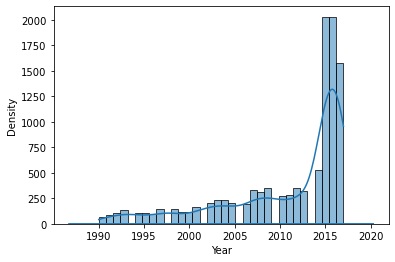

Mean of Year: 2010.896370185647, Variance of Year: 49.41434762130943, Standard Deviation of Year: 7.029533954773206


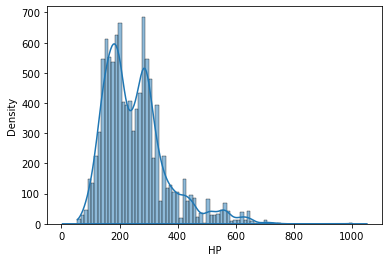

Mean of HP: 254.55306178996952, Variance of HP: 12065.16315037887, Standard Deviation of HP: 109.84153654414558


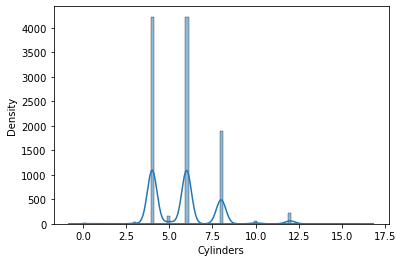

Mean of Cylinders: 5.691604322527016, Variance of Cylinders: 3.1277726614555426, Standard Deviation of Cylinders: 1.7685510061786578


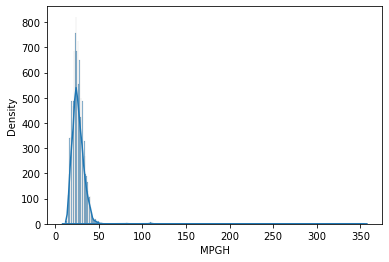

Mean of MPGH: 26.30811859240787, Variance of MPGH: 56.319796450741485, Standard Deviation of MPGH: 7.504651654190319


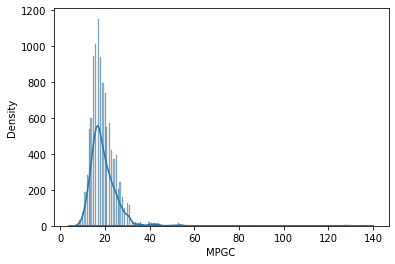

Mean of MPGC: 19.32760690865429, Variance of MPGC: 44.13698303112906, Standard Deviation of MPGC: 6.643567041215816


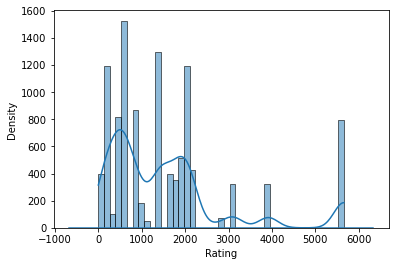

Mean of Rating: 1562.2448508358732, Variance of Rating: 2096878.6299557025, Standard Deviation of Rating: 1448.0602991435483


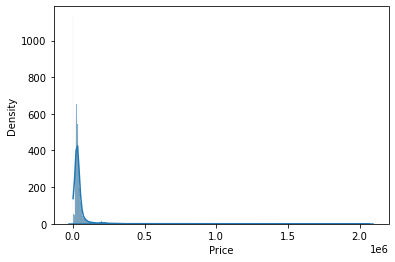

Mean of Price: 42493.25427172809, Variance of Price: 3880605361.50277, Standard Deviation of Price: 62294.5050666812


In [15]:
plt.figure()

names = df.columns.values  #get column names in dictionary
for i in range(len(df.columns)):

    datatype = df[names[i]].dtype  #get column datatype
    if datatype == "int64" or datatype == "float64":   #plot histogram if create a plot
        sns.kdeplot(data=df, x=names[i])
        sns.histplot(df, x=names[i], kde=True)
        plt.show()
        mean = statistics.mean(df[names[i]])
        var = statistics.variance(df[names[i]])
        std = statistics.stdev(df[names[i]])
        print(f"Mean of {names[i]}: {mean}, Variance of {names[i]}: {var}, Standard Deviation of {names[i]}: {std}")

C:\Users\MICHEAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


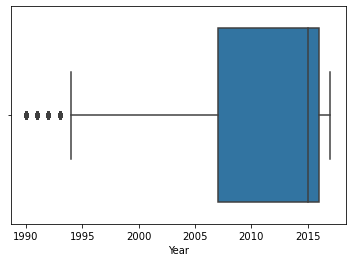

C:\Users\MICHEAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


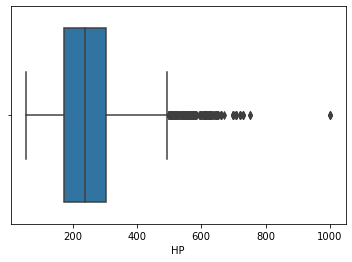

C:\Users\MICHEAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


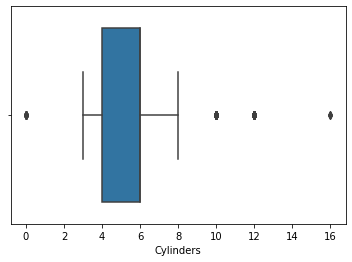

C:\Users\MICHEAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


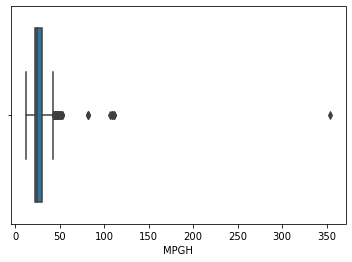

C:\Users\MICHEAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


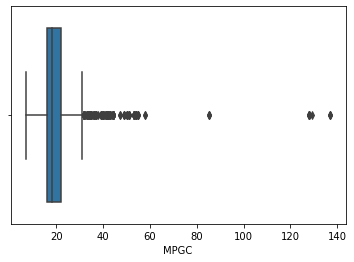

C:\Users\MICHEAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


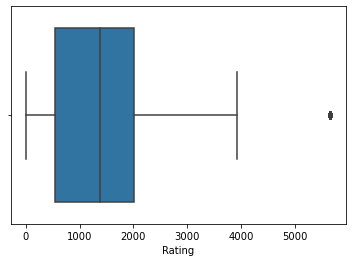

C:\Users\MICHEAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


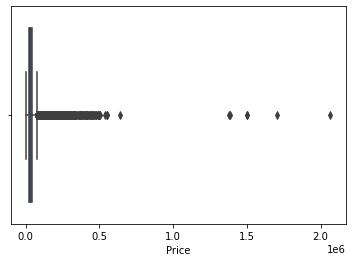

In [16]:
#boxplot
names = df.columns.values  #get column names in dictionary
for i in range(len(df.columns)):

    datatype = df[names[i]].dtype  #get column datatype
    if datatype == "int64" or datatype == "float64":   #plot histogram if create a plot
        #sns.kdeplot(data=df, x=names[i])
        sns.boxplot(df[names[i]])
        plt.show()

## Detection and removal of outliers in data

In [17]:
#Computation of interquartile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPGH             8.0
MPGC             6.0
Rating        1460.0
Price        21327.5
dtype: float64


In [18]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8438, 11)

## Plotting of graphs

<AxesSubplot:xlabel='Price', ylabel='Density'>

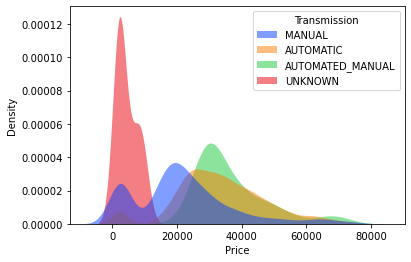

In [19]:

sns.kdeplot( 
 data=df, x="Price", hue="Transmission", 
 fill=True, common_norm=False, palette="bright", 
 alpha=.5, linewidth=0, 
)
#print()

<AxesSubplot:xlabel='Price', ylabel='Density'>

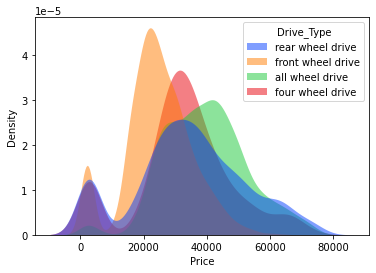

In [20]:
sns.kdeplot( 
 data=df, x="Price", hue="Drive_Type", 
 fill=True, common_norm=False, palette="bright", 
 alpha=.5, linewidth=0, 
)

## Heatmaps

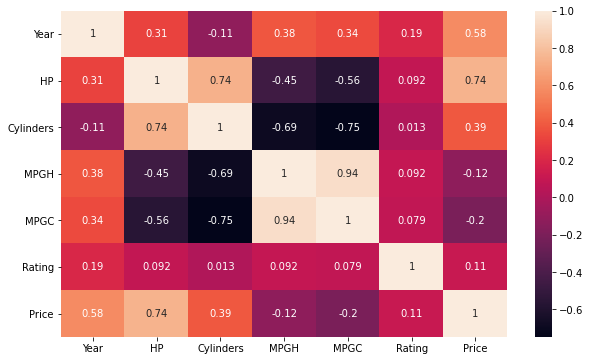

In [21]:
#corellation heatmap
plt.figure(figsize=(10, 6))
#sns.set_theme(style= "whitegrid")
sns.heatmap(df.corr(), annot=True)  
plt.show()

### Relationship check using scatterplot between Price, HP and Year

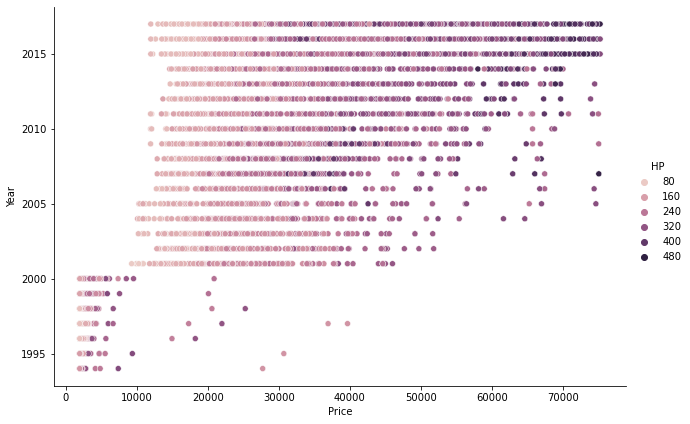

In [33]:
sns.relplot(x = "Price", y = "Year", hue = "HP", data = df, aspect = 1.5, height = 5.8)